## Linear Regression Assignment

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading dataset
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.shape

(205, 26)

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
#checking for no of unique values in the dataset
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

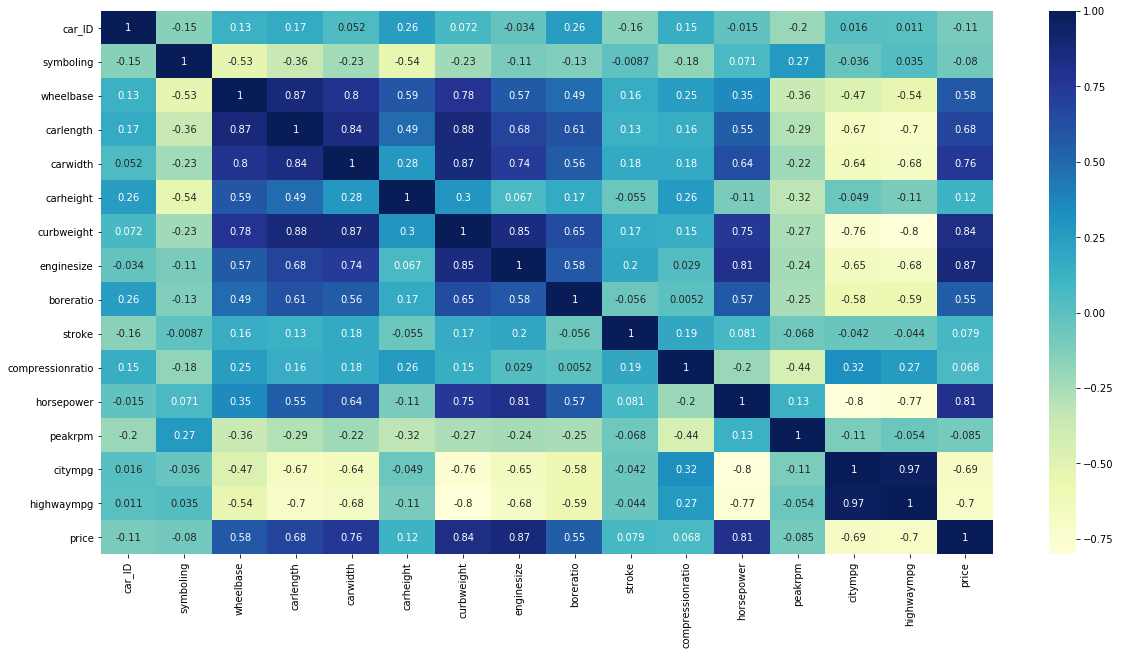

In [7]:
#checking correlation among variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [8]:
#Dropping the variables with high correlation
df.drop(['highwaympg','curbweight','carwidth','wheelbase','enginesize'],axis=1,inplace=True)

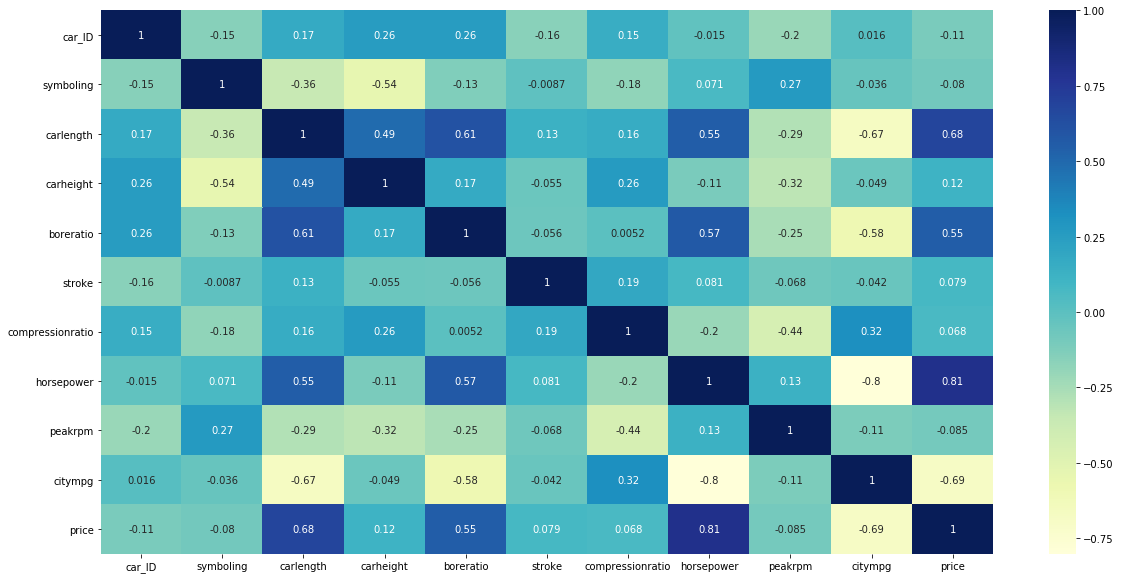

In [9]:
#checking correlation of remaining variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

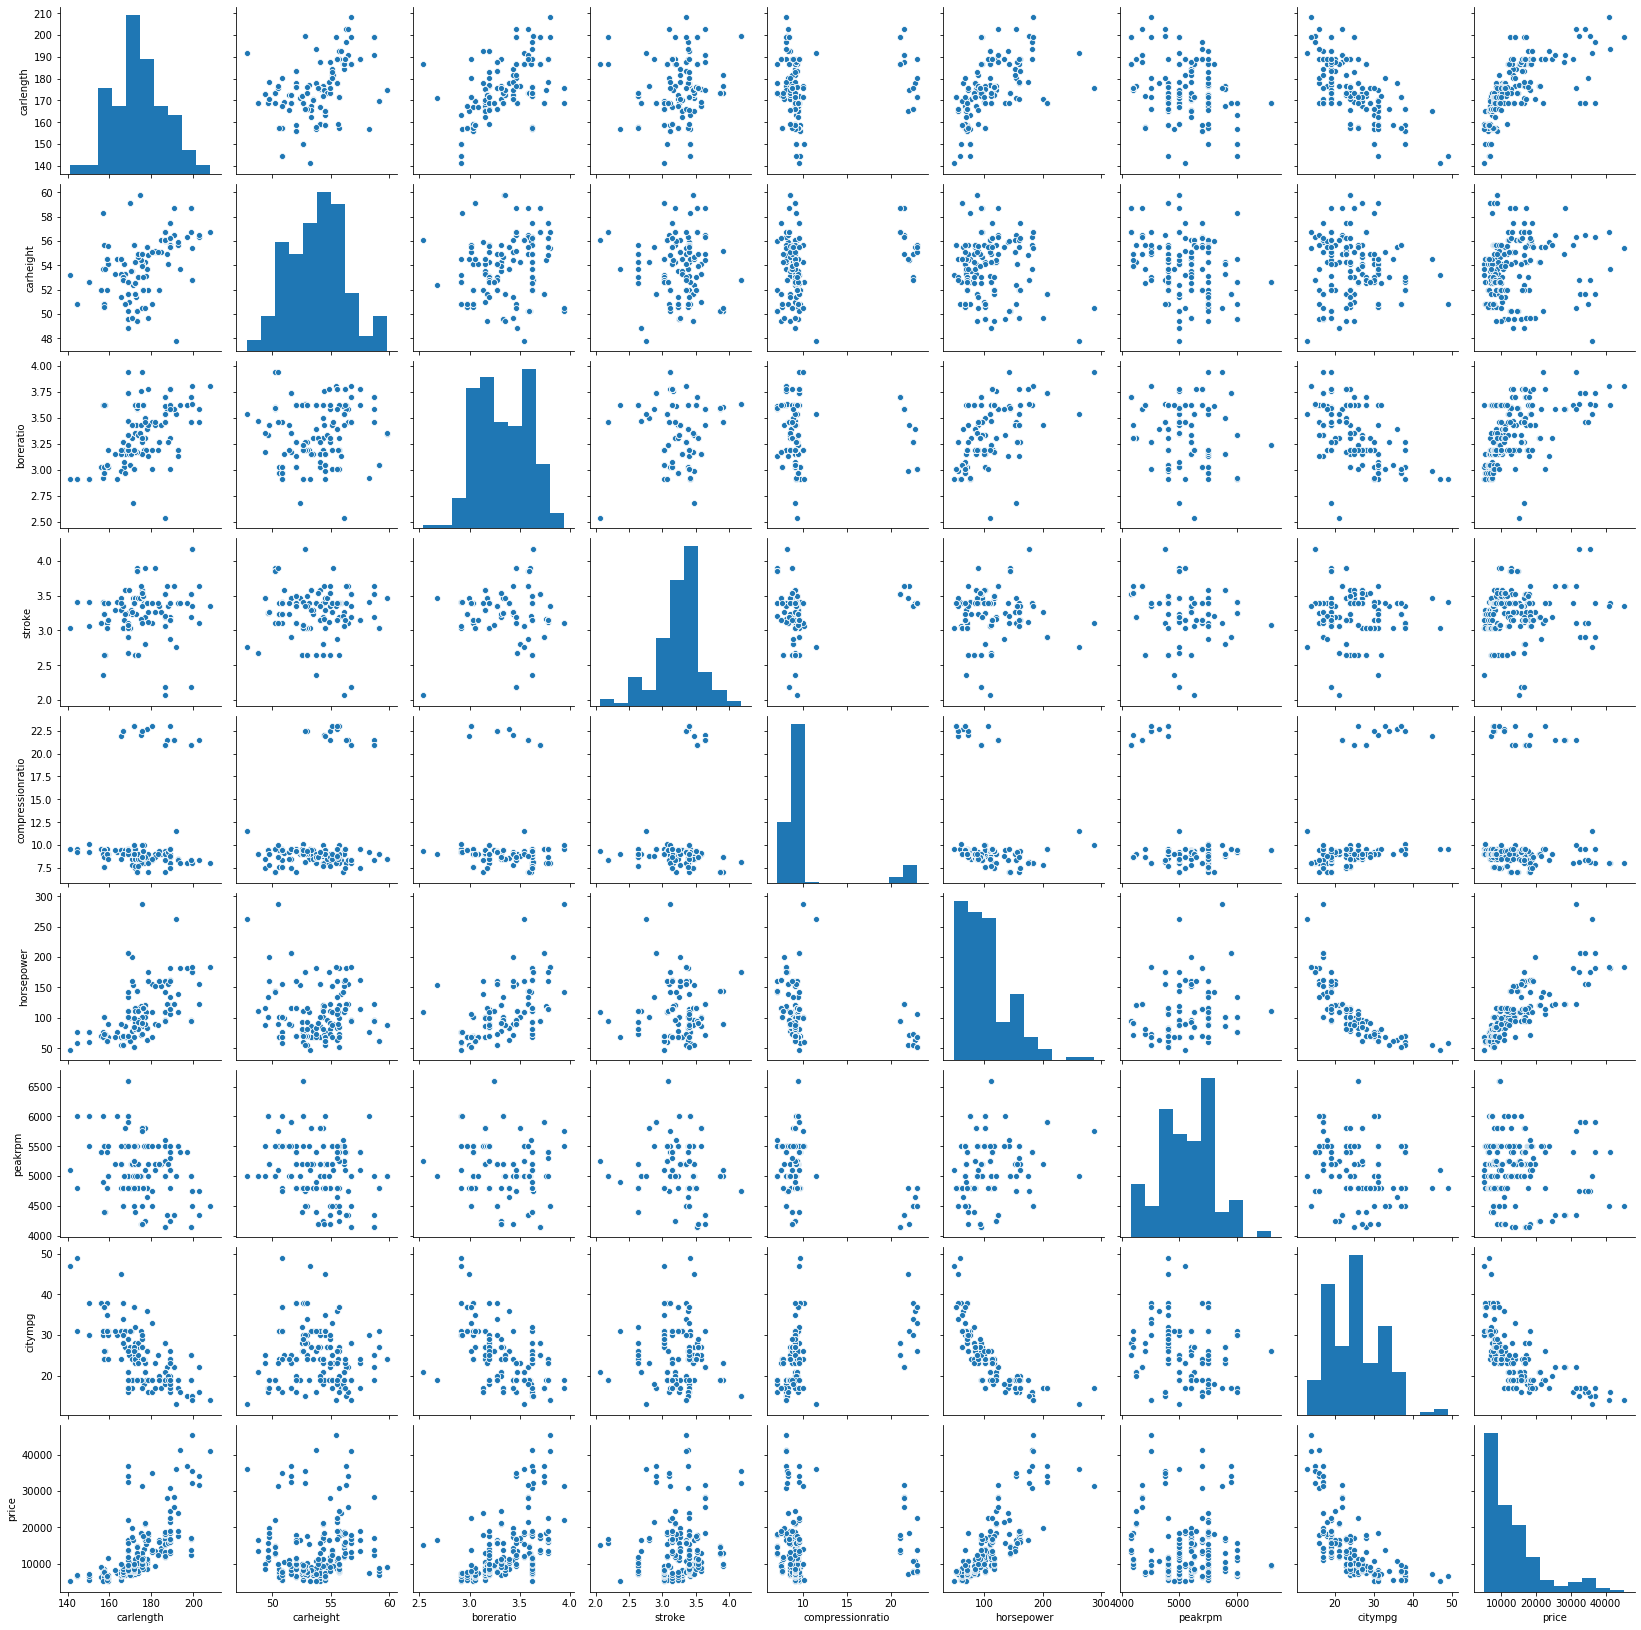

In [10]:
#Viewing the relationships between numerical variables
sns.pairplot(df[['carlength','carheight','boreratio','stroke','compressionratio','horsepower'
                ,'peakrpm','citympg','price']])

### We observe horsepower and carlength shows a good linear relationship with price

In [11]:
#converting fueltype to numerical labels
df['fueltype']=df[['fueltype']].apply(lambda x:x.map({'gas':0,'diesel':1}))

In [12]:
#converting aspiration to numerical labels
df['aspiration']=df[['aspiration']].apply(lambda x:x.map({'std':0,'turbo':1}))

In [13]:
#converting doornumber to numerical labels
df['doornumber']=df[['doornumber']].apply(lambda x:x.map({'two':0,'four':1}))

In [14]:
#converting enginelocation to numerical labels
df['enginelocation']=df[['enginelocation']].apply(lambda x:x.map({'front':0,'rear':1}))

In [15]:
#Creating dummy variables for drivewheel
drive=pd.get_dummies(df['drivewheel'],drop_first = True)
df=pd.concat([df,drive],axis=1)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,fwd,rwd
0,1,3,alfa-romero giulia,0,0,0,convertible,rwd,0,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,0,1
1,2,3,alfa-romero stelvio,0,0,0,convertible,rwd,0,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,0,1
2,3,1,alfa-romero Quadrifoglio,0,0,0,hatchback,rwd,0,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,0,1
3,4,2,audi 100 ls,0,0,1,sedan,fwd,0,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,1,0
4,5,2,audi 100ls,0,0,1,sedan,4wd,0,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,1,sedan,rwd,0,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,16845.0,0,1
201,202,-1,volvo 144ea,0,1,1,sedan,rwd,0,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,19045.0,0,1
202,203,-1,volvo 244dl,0,0,1,sedan,rwd,0,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,21485.0,0,1
203,204,-1,volvo 246,1,1,1,sedan,rwd,0,188.8,...,idi,3.01,3.40,23.0,106,4800,26,22470.0,0,1


In [16]:
#Dropping drivewheel
df.drop(['drivewheel'],axis=1,inplace=True)

In [17]:
#Creating dummy variables for carbody
carbody=pd.get_dummies(df['carbody'],drop_first = True)
df=pd.concat([df,carbody],axis=1)
df.drop(['carbody'],axis=1,inplace=True)

In [18]:
#creating dummy variables for enginetype
enginetype=pd.get_dummies(df['enginetype'],drop_first = True)
df=pd.concat([df,enginetype],axis=1)
df.drop(['enginetype'],axis=1,inplace=True)

In [19]:
#creating dummy variables for cylindernumber
cyl=pd.get_dummies(df['cylindernumber'],drop_first = True)
df=pd.concat([df,cyl],axis=1)
df.drop(['cylindernumber'],axis=1,inplace=True)

In [20]:
#Creating dummy variables for fuelsystem
fsys=pd.get_dummies(df['fuelsystem'],drop_first = True)
df=pd.concat([df,fsys],axis=1)
df.drop(['fuelsystem'],axis=1,inplace=True)

In [21]:
#Creating dummy variables for symboling
sym=pd.get_dummies(df['symboling'],drop_first = True)
df=pd.concat([df,sym],axis=1)
df.drop(['symboling'],axis=1,inplace=True)

In [22]:
#Dropping Car ID as it has all unique values
df.drop(['car_ID'],axis=1,inplace=True)

In [23]:
#Taking the carModel name from carName
df['CarName']=df['CarName'].apply(lambda x:x.split(' ')[0])

In [24]:
#Correcting spelling errors in carName
df['CarName']=df['CarName'].replace({'porcshce':'porsche'})
df['CarName']=df['CarName'].replace({'toyouta':'toyota'})

In [25]:
#Checking unique values in carName
df['CarName'].nunique()

26

In [26]:
#Converting carName to dummy variables
carName=pd.get_dummies(df['CarName'],drop_first = True)
df=pd.concat([df,carName],axis=1)
df.drop(['CarName'],axis=1,inplace=True)

In [27]:
df.nunique()

fueltype           2
aspiration         2
doornumber         2
enginelocation     2
carlength         75
                  ..
toyota             2
vokswagen          2
volkswagen         2
volvo              2
vw                 2
Length: 68, dtype: int64

In [28]:
#Dividing data into train and test
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [29]:
df_train.shape

(143, 68)

In [30]:
df_test.shape

(62, 68)

In [31]:
#Scaling the numerical variables using MinMaxScaler
scaler=MinMaxScaler()
num_vars=['carlength','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,boreratio,stroke,compressionratio,horsepower,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volkswagen,volvo,vw
122,0,0,1,0,0.426016,0.265487,0.230159,0.525253,0.15000,0.083333,...,1,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0.452033,0.212389,1.000000,0.464646,0.15625,0.395833,...,0,1,0,0,0,0,0,0,0,0
166,0,0,0,0,0.448780,0.424779,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0.450407,0.088496,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,0,0,0
199,0,1,1,0,0.775610,0.858407,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,0,0,0,1,0


In [32]:
#Creating independent and dependent variable
y_train=df_train.pop('price')
X_train=df_train

In [33]:
#Performing RFE to get top 20 features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 3),
 ('aspiration', False, 39),
 ('doornumber', False, 44),
 ('enginelocation', True, 1),
 ('carlength', True, 1),
 ('carheight', False, 31),
 ('boreratio', False, 16),
 ('stroke', False, 9),
 ('compressionratio', False, 2),
 ('horsepower', True, 1),
 ('peakrpm', False, 17),
 ('citympg', False, 11),
 ('fwd', False, 23),
 ('rwd', False, 25),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('dohcv', True, 1),
 ('l', False, 24),
 ('ohc', False, 10),
 ('ohcf', False, 12),
 ('ohcv', False, 43),
 ('rotor', False, 14),
 ('five', False, 4),
 ('four', False, 7),
 ('six', False, 6),
 ('three', False, 15),
 ('twelve', True, 1),
 ('two', False, 19),
 ('2bbl', False, 42),
 ('4bbl', False, 40),
 ('idi', False, 5),
 ('mfi', False, 36),
 ('mpfi', False, 30),
 ('spdi', False, 41),
 ('spfi', False, 37),
 (-1, True, 1),
 (0, True, 1),
 (1, True, 1),
 (2, True, 1),
 (3, True, 1),
 ('alfa-romero', False, 13),
 ('audi', True, 1),
 ('bmw', True,

In [36]:
#Variables selected
col = X_train.columns[rfe.support_]
col

Index(['enginelocation',      'carlength',     'horsepower',        'hardtop',
            'hatchback',          'sedan',          'wagon',          'dohcv',
               'twelve',               -1,                0,                1,
                      2,                3,           'audi',            'bmw',
                'buick',         'jaguar',        'porsche',          'volvo'],
      dtype='object')

In [37]:
#Variables ignored
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'peakrpm', 'citympg', 'fwd', 'rwd', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'two',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'alfa-romero',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'maxda', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault', 'saab',
       'subaru', 'toyota', 'vokswagen', 'volkswagen', 'vw'],
      dtype='object')

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [41]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     81.75
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.47e-61
Time:                        19:21:27   Log-Likelihood:                 207.66
No. Observations:                 143   AIC:                            -373.3
Df Residuals:                     122   BIC:                            -311.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1725      0.074     -2.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,207.90
11,0,31.50
12,1,29.50
14,3,16.62
6,sedan,15.40
13,2,15.37
5,hatchback,11.67
10,-1,8.97
7,wagon,8.13
3,horsepower,3.94


### Removing dohcv which has high P value

In [43]:
X_train_rfe = X_train_rfe.drop(['dohcv'], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     86.53
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.18e-62
Time:                        19:21:27   Log-Likelihood:                 207.49
No. Observations:                 143   AIC:                            -375.0
Df Residuals:                     123   BIC:                            -315.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1740      0.074     -2.

,Features,VIF
0,const,207.63
10,0,31.50
11,1,29.49
13,3,16.39
12,2,15.37
6,sedan,15.16
5,hatchback,11.49
9,-1,8.96
7,wagon,8.03
2,carlength,3.45


### Removing twelve which has high P value

In [44]:
X_train_rfe = X_train_rfe.drop(['twelve'], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     91.49
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.35e-62
Time:                        19:21:27   Log-Likelihood:                 207.06
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     124   BIC:                            -319.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1755      0.074     -2.

,Features,VIF
0,const,207.51
9,0,31.50
10,1,29.47
12,3,16.37
11,2,15.36
6,sedan,15.13
5,hatchback,11.49
8,-1,8.96
7,wagon,8.01
2,carlength,3.29


### Removing hardtop which has high P Value

In [45]:
X_train_rfe = X_train_rfe.drop(['hardtop'], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     94.99
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.62e-63
Time:                        19:21:27   Log-Likelihood:                 205.22
No. Observations:                 143   AIC:                            -374.4
Df Residuals:                     125   BIC:                            -321.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2151      0.071     -3.

,Features,VIF
0,const,188.86
8,0,31.48
9,1,29.47
11,3,16.12
10,2,15.32
5,sedan,9.37
7,-1,8.96
4,hatchback,7.09
6,wagon,5.32
2,carlength,3.22


### Now all p values are less so we remove '0' which has highest VIF

In [46]:
X_train_rfe = X_train_rfe.drop([0], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     91.78
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.46e-61
Time:                        19:21:27   Log-Likelihood:                 198.41
No. Observations:                 143   AIC:                            -362.8
Df Residuals:                     126   BIC:                            -312.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0018      0.037      0.

,Features,VIF
0,const,46.97
5,sedan,9.36
4,hatchback,7.07
6,wagon,5.32
2,carlength,3.19
3,horsepower,2.96
10,3,2.19
15,porsche,1.98
7,-1,1.95
8,1,1.82


### We see P value of '-1' rises, removing the same

In [47]:
X_train_rfe = X_train_rfe.drop([-1], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     98.65
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.46e-62
Time:                        19:21:27   Log-Likelihood:                 198.40
No. Observations:                 143   AIC:                            -364.8
Df Residuals:                     127   BIC:                            -317.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0015      0.037      0.

,Features,VIF
0,const,46.88
5,sedan,9.35
4,hatchback,6.99
6,wagon,5.31
2,carlength,3.17
3,horsepower,2.92
9,3,2.08
14,porsche,1.97
7,1,1.76
1,enginelocation,1.69


### Removing '3' which has high P value

In [48]:
X_train_rfe = X_train_rfe.drop([3], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     106.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.43e-63
Time:                        19:21:27   Log-Likelihood:                 198.36
No. Observations:                 143   AIC:                            -366.7
Df Residuals:                     128   BIC:                            -322.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0062      0.033      0.

,Features,VIF
0,const,37.44
5,sedan,7.55
4,hatchback,6.47
6,wagon,4.21
2,carlength,3.17
3,horsepower,2.79
13,porsche,1.97
1,enginelocation,1.69
7,1,1.49
12,jaguar,1.38


### Removing '1' which has high P value

In [49]:
X_train_rfe = X_train_rfe.drop([1], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     113.6
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           6.04e-64
Time:                        19:21:28   Log-Likelihood:                 197.24
No. Observations:                 143   AIC:                            -366.5
Df Residuals:                     129   BIC:                            -325.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0074      0.031     -0.

,Features,VIF
0,const,34.25
5,sedan,7.38
4,hatchback,6.35
6,wagon,4.20
2,carlength,2.83
3,horsepower,2.79
12,porsche,1.96
1,enginelocation,1.69
11,jaguar,1.38
10,buick,1.23


### Removing '2' which has high P value

In [50]:
X_train_rfe = X_train_rfe.drop([2], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     122.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.12e-64
Time:                        19:21:28   Log-Likelihood:                 196.41
No. Observations:                 143   AIC:                            -366.8
Df Residuals:                     130   BIC:                            -328.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0171      0.030     -0.

,Features,VIF
0,const,32.07
5,sedan,7.20
4,hatchback,6.26
6,wagon,4.06
2,carlength,2.82
3,horsepower,2.78
11,porsche,1.96
1,enginelocation,1.68
10,jaguar,1.37
9,buick,1.23


### All P values are low now so we remove now 'sedan' which has highest VIF

In [51]:
X_train_rfe = X_train_rfe.drop(['sedan'], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     126.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.32e-64
Time:                        19:21:28   Log-Likelihood:                 192.49
No. Observations:                 143   AIC:                            -361.0
Df Residuals:                     131   BIC:                            -325.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0784      0.021     -3.

,Features,VIF
0,const,14.28
2,carlength,2.66
3,horsepower,2.65
10,porsche,1.95
4,hatchback,1.55
1,enginelocation,1.54
9,jaguar,1.36
8,buick,1.20
5,wagon,1.19
7,bmw,1.19


### We see that P value of hatchback rises, so we remove the same

In [52]:
X_train_rfe = X_train_rfe.drop(['hatchback'], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     140.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.91e-65
Time:                        19:21:28   Log-Likelihood:                 192.42
No. Observations:                 143   AIC:                            -362.8
Df Residuals:                     132   BIC:                            -330.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0827      0.017     -4.

,Features,VIF
0,const,9.51
3,horsepower,2.40
2,carlength,2.19
9,porsche,1.95
1,enginelocation,1.49
8,jaguar,1.34
7,buick,1.20
6,bmw,1.16
10,volvo,1.15
4,wagon,1.14


### Removing wagon which has high P value

In [53]:
X_train_rfe = X_train_rfe.drop(['wagon'], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     154.0
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.83e-66
Time:                        19:21:28   Log-Likelihood:                 191.07
No. Observations:                 143   AIC:                            -362.1
Df Residuals:                     133   BIC:                            -332.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0795      0.017     -4.

,Features,VIF
0,const,9.37
3,horsepower,2.35
2,carlength,1.96
8,porsche,1.95
1,enginelocation,1.49
7,jaguar,1.33
6,buick,1.19
9,volvo,1.15
5,bmw,1.13
4,audi,1.08


### We observe that all P values are very low and VIF is also considerably low. So we select this model

In [54]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     154.0
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.83e-66
Time:                        19:21:28   Log-Likelihood:                 191.07
No. Observations:                 143   AIC:                            -362.1
Df Residuals:                     133   BIC:                            -332.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0795      0.017     -4.707      0.000      -0.113      -0.046
enginelocation     0.2344      0.081      2.901      0.004       0.075       0.394
carlength          0.2647      0.038      6.993      0.000       0.190       0.340
horsepower         0.4969      0.051      9.697      0.000       0.396       0.598
audi               0.1012      0.031      3.243      0.001       0.039       0.163
bmw                0.3052      0.029     10.417      0.000       0.247       0.363
buick              0.3854      0.033     11.763      0.000       0.321       0.450
jaguar             0.3292      0.044      7.430      0.000       0.242       0.417
porsche            0.1949      0.054      3.631      0.000       0.089       0.301
volvo              0.1024      0.029      3.480      0.001       0.044       0.161
==============================================================================
Omnibus:                       36.384   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.072
Skew:                           1.060   Prob(JB):                     1.51e-18
Kurtosis:                       6.046   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Predicting values from the model, and calculate Rsquare
y_pred_train=lm.predict(X_train_rfe)
r2_score(y_true=y_train,y_pred=lm.predict(X_train_rfe))

0.9124313973568707

In [56]:
#Dropping constant so columns can be used in test set
X_train_new=X_train_rfe.drop(['const'],axis=1)

### Residual analysis

Text(0.5, 0, 'Errors')

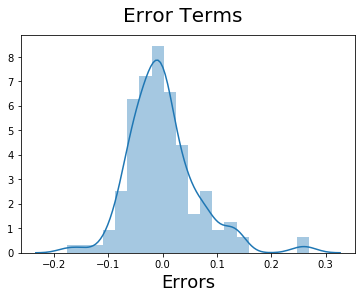

In [57]:
#Viweing the residual plot to see it follows normal distribution
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

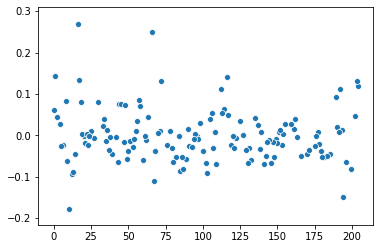

In [58]:
#Viewing the scatterplot to see we dont find any patterns, ie constant variance
sns.scatterplot(y=(y_train-y_pred_train),x=X_train.index)


In [59]:
#Transforming numerical variables in test set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [60]:
df_test

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,boreratio,stroke,compressionratio,horsepower,...,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volkswagen,volvo,vw
160,0,0,1,0,0.409756,0.460177,0.404762,0.424242,0.12500,0.091667,...,0,0,0,0,0,1,0,0,0,0
186,0,0,1,0,0.497561,0.699115,0.404762,0.611111,0.12500,0.154167,...,0,0,0,0,0,0,0,1,0,0
59,0,0,0,0,0.596748,0.522124,0.563492,0.606061,0.10000,0.150000,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0.448780,0.424779,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,1,0,0,0,0
140,0,0,0,0,0.263415,0.699115,0.746032,0.227273,0.10625,0.104167,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0,0,1,0,0.544715,1.061947,0.523810,0.641414,0.09375,0.166667,...,0,0,0,0,0,0,0,0,0,0
29,0,1,0,0,0.521951,0.212389,0.730159,0.863636,0.00000,0.404167,...,0,0,0,0,0,0,0,0,0,0
182,1,0,0,0,0.497561,0.699115,0.261905,0.611111,1.00000,0.016667,...,0,0,0,0,0,0,1,0,0,0
40,0,0,1,0,0.557724,0.557522,0.373016,0.702020,0.12500,0.158333,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Creating independent and dependent variable in test set
y_test = df_test.pop('price')
X_test = df_test

In [62]:
#Using features selected in train to be same in test
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [63]:
X_test_new.columns

Index(['const', 'enginelocation', 'carlength', 'horsepower', 'audi', 'bmw',
       'buick', 'jaguar', 'porsche', 'volvo'],
      dtype='object')

In [64]:
X_train_rfe.columns

Index(['const', 'enginelocation', 'carlength', 'horsepower', 'audi', 'bmw',
       'buick', 'jaguar', 'porsche', 'volvo'],
      dtype='object')

In [65]:
X_train_rfe.shape

(143, 10)

In [66]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

In [67]:
#Evaluating Rsquare for test dataset
r2_score(y_true=y_test,y_pred=lm.predict(X_test_new))

0.9079235923046705

### Hence we observe that we have the below model which gives 
### Train accuracy 91.2%
### Test Accuracy 90.8%

In [68]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     154.0
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.83e-66
Time:                        19:21:30   Log-Likelihood:                 191.07
No. Observations:                 143   AIC:                            -362.1
Df Residuals:                     133   BIC:                            -332.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0795      0.017     -4.

### Conclusion : From the above model we conclude that features like enginelocation, carlength and horseepower are impaciting the price the most. Also car models like audi,bmw, buick, jaguar, porsche and volvo are the ones which impact the price the most. 